# Expectation-Maximum Algorithm

The EM algorithm breaks an impossible optimization problem into two manageable steps that feed into each other: first calculating what the hidden data probably looks like given current parameter estimates, then finding better parameters by treating those probabilistic guesses as if they were observations.

# Graphical Summary

![Fig](./graphical_summary/slides/Slide33.png)

# Key Formula


Given the statistical model which generates a set $\mathbf{X}$ of observed data, a set of unobserved latent data $\mathbf{Z}$, and a vector of unknown parameters $\boldsymbol{\theta}$, along with a likelihood function $L(\boldsymbol{\theta}; \mathbf{X}, \mathbf{Z}) = p(\mathbf{X}, \mathbf{Z} \mid \boldsymbol{\theta})$, the maximum likelihood estimate (MLE) of the unknown parameters is determined by maximizing the marginal likelihood of the observed data

$$
L(\boldsymbol{\theta}; \mathbf{X}) = p(\mathbf{X} \mid \boldsymbol{\theta}) = \int p(\mathbf{X}, \mathbf{Z} \mid \boldsymbol{\theta}) \, d\mathbf{Z} = \int p(\mathbf{X} \mid \mathbf{Z}, \boldsymbol{\theta}) p(\mathbf{Z} \mid \boldsymbol{\theta}) \, d\mathbf{Z}
$$

However, this quantity is often intractable since $\mathbf{Z}$ is unobserved and the distribution of $\mathbf{Z}$ is unknown before attaining $\boldsymbol{\theta}$.

The **EM algorithm** seeks to find the **maximum likelihood estimate (MLE)** of the marginal likelihood by iteratively applying these two steps:

**Expectation step (E step):** Define $Q(\boldsymbol{\theta} \mid \boldsymbol{\theta}^{(t)})$ as the expected value of the log likelihood function of $\boldsymbol{\theta}$, i.e., $\ell(\boldsymbol{\theta})$, with respect to the current conditional distribution of $\mathbf{Z}$ given $\mathbf{X}$ and the current estimates of the parameters $\boldsymbol{\theta}^{(t)}$:

$$
Q(\boldsymbol{\theta} \mid \boldsymbol{\theta}^{(t)}) = \mathbb{E}_{\mathbf{Z} \sim p(\cdot \mid \mathbf{X}, \boldsymbol{\theta}^{(t)})} [\log p(\mathbf{X}, \mathbf{Z} \mid \boldsymbol{\theta})] := \int \log p(\mathbf{X}, \mathbf{Z} \mid \boldsymbol{\theta}) \, p(\mathbf{Z} \mid \mathbf{X}, \boldsymbol{\theta}^{(t)}) \, d\mathbf{Z}
$$

**Maximization step (M step):** Find the parameters that maximize this quantity:

$$
\boldsymbol{\theta}^{(t+1)} = \arg\max_{\boldsymbol{\theta}} Q(\boldsymbol{\theta} \mid \boldsymbol{\theta}^{(t)})
$$

# Technical Details

## Why EM Works: The Monotonic Increase Guarantee

The fundamental question is: why does maximizing $Q(\boldsymbol{\theta} \mid \boldsymbol{\theta}^{(t)})$ lead to an increase in the observed-data log-likelihood $\ell(\boldsymbol{\theta}; \mathbf{X}) = \log p(\mathbf{X} \mid \boldsymbol{\theta})$?

### The Key Decomposition

For any parameter values $\boldsymbol{\theta}$ and $\boldsymbol{\theta}^{(t)}$, the observed-data log-likelihood can be decomposed as:

$$
\ell(\boldsymbol{\theta}; \mathbf{X}) = Q(\boldsymbol{\theta} \mid \boldsymbol{\theta}^{(t)}) - H(\boldsymbol{\theta} \mid \boldsymbol{\theta}^{(t)})
$$

where $H(\boldsymbol{\theta} \mid \boldsymbol{\theta}^{(t)})$ is the **conditional entropy** of the latent variables:

$$
H(\boldsymbol{\theta} \mid \boldsymbol{\theta}^{(t)}) = \mathbb{E}_{\mathbf{Z} \sim p(\cdot \mid \mathbf{X}, \boldsymbol{\theta}^{(t)})} [\log p(\mathbf{Z} \mid \mathbf{X}, \boldsymbol{\theta})]
$$

The entropy term $H(\boldsymbol{\theta} \mid \boldsymbol{\theta}^{(t)})$ is **maximized when** $\boldsymbol{\theta} = \boldsymbol{\theta}^{(t)}$.

**Each EM iteration increases (or maintains) the observed-data log-likelihood (complete proof can be found [here](https://en.wikipedia.org/wiki/Expectation–maximization_algorithm)).**

## Practical Implementation

### E-Step: Computing Responsibilities via Bayes' Rule

The E-step answers the question: "Given what I observed and my current parameter guess, how likely is each possible hidden state?"

For each observation $i$ and each possible latent state $k$, compute:

$$
w_{ik}^{(t)} = p(Z_i = k \mid X_i, \boldsymbol{\theta}^{(t)}) = \frac{p(X_i \mid Z_i = k, \boldsymbol{\theta}^{(t)}) \cdot p(Z_i = k \mid \boldsymbol{\theta}^{(t)})}{\sum_{k'} p(X_i \mid Z_i = k', \boldsymbol{\theta}^{(t)}) \cdot p(Z_i = k' \mid \boldsymbol{\theta}^{(t)})}
$$

These $w_{ik}^{(t)}$ are posterior probability: they tell us the probability that observation $i$ belongs to latent state $k$. This is just Bayes' rule: multiply the likelihood of the observation by the prior probability of the state, then normalize.

### M-Step: Maximizing the Q-Function

The M-step finds the parameter values that best explain the data, treating the responsibilities as weights:

$$
\boldsymbol{\theta}^{(t+1)} = \arg\max_{\boldsymbol{\theta}} \sum_{i=1}^n \sum_{k} w_{ik}^{(t)} \log p(X_i, Z_i = k \mid \boldsymbol{\theta})
$$

This is typically just weighted maximum likelihood estimation. For many models, this has simple closed-form solutions like weighted averages or weighted proportions.

For more detailed examples and alternative perspectives on the EM algorithm, we recommend the following references from Matthew Stephens:
- [A prelude to the EM algorithm](https://stephens999.github.io/fiveMinuteStats/em_algorithm_01.html) 
- [A Variational view of the EM algorithm](https://stephens999.github.io/fiveMinuteStats/em_variational.html)
- [EM in Gaussian mixture models](https://stephens999.github.io/fiveMinuteStats/intro_to_em.html)

# Related Topics

- [likelihood](https://statfungen.github.io/statgen-primer/likelihood.html)
- [maximum likelihood estimation](https://statfungen.github.io/statgen-primer/maximum_likelihood_estimation.html)
- [Bayes rule](https://statfungen.github.io/statgen-primer/Bayes_rule.html)


# Example

Suppose we're studying a genetic variant in a population and want to estimate its minor allele frequency (MAF). We've genotyped $N$ individuals, but our sequencing technology isn't perfect—it makes errors. Some individuals who are truly homozygous AA might be called as AB or BB, and vice versa.

**The problem:** If we naively count alleles from the observed genotypes, our MAF estimate will be biased. How can we estimate both the true MAF and the error rate simultaneously?

Here we apply the EM algorithm to solve this problem. The true genotypes are our missing data—if we knew them, estimating MAF and error rate would be trivial. EM lets us handle this uncertainty.


## Step 1: Generate Simulated Data

Let's create a dataset where we know the ground truth, so we can verify our EM algorithm works correctly.


In [8]:
rm(list=ls())
library(ggplot2)
library(dplyr)
set.seed(581)
# True parameters
f_true <- 0.3 # true MAF
epsilon_true <- 0.05 # true error rate
n <- 10000 # sample size

# Step 1: Generate true genotypes according to Hardy-Weinberg equilibrium
# P(g=0) = (1-f)^2, P(g=1) = 2f(1-f), P(g=2) = f^2
hw_probs <- c((1-f_true)^2, 2*f_true*(1-f_true), f_true^2)
true_genotypes <- sample(0:2, size = n, replace = TRUE, prob = hw_probs)

# Step 2: Add genotyping errors
observed_genotypes <- true_genotypes  # Start with true genotypes
errors <- runif(n) < epsilon_true     # Which observations have errors?

# For observations with errors, randomly assign a genotype
for (i in which(errors)) {
  observed_genotypes[i] <- sample(0:2, size = 1)
}

# Create a data frame
data <- data.frame(
  individual = 1:n,
  true_genotype = true_genotypes,
  observed_genotype = observed_genotypes,
  error = errors
)

# Summary
cat("True MAF:", f_true, "\n")
cat("Naive MAF estimate:", sum(observed_genotypes) / (2*n), "\n")
cat("Number of errors introduced:", sum(errors), "\n")

True MAF: 0.3 
Naive MAF estimate: 0.31315 
Number of errors introduced: 494 


## Step 2: Develop the EM Algorithm

### Model Setup

**Observed data:** $\mathbf{d} = (d_1, \ldots, d_N)$ where $d_i \in \{0, 1, 2\}$

**Missing data:** $\mathbf{g} = (g_1, \ldots, g_N)$ where $g_i \in \{0, 1, 2\}$ (true genotypes)

**Parameters:** $\theta = (f, \epsilon)$

### Error Model

The error model assumes that with probability $\epsilon$, a genotyping error occurs and the observed genotype is randomly assigned to {0, 1, 2} with equal probability $\frac{1}{3}$ each. When the true genotype is $j$, observing the correct genotype $j$ can happen two ways: no error (probability $1-\epsilon$) or an error that randomly lands on $j$ (probability $\epsilon \times \frac{1}{3}$), giving total probability $1 - \frac{2\epsilon}{3}$. Observing an incorrect genotype $k \neq j$ only happens through errors, with probability $\frac{\epsilon}{3}$.

$$
p(d_i = k \mid g_i = j, \epsilon) = \begin{cases}
1 - \frac{2\epsilon}{3} & \text{if } k = j \\
\frac{\epsilon}{3} & \text{if } k \neq j
\end{cases}
$$

### Hardy-Weinberg Model

$$
p(g_i = 0 \mid f) = (1-f)^2, \quad p(g_i = 1 \mid f) = 2f(1-f), \quad p(g_i = 2 \mid f) = f^2
$$

### EM Algorithm Implementation

In [9]:
# Function to compute error model probabilities
p_obs_given_true <- function(d, g, epsilon) {
  # P(observed = d | true = g, epsilon)
  if (d == g) {
    return(1 - 2*epsilon/3)
  } else {
    return(epsilon/3)
  }
}

# Function to compute Hardy-Weinberg probabilities
p_true_given_f <- function(g, f) {
  # P(true genotype = g | MAF = f)
  if (g == 0) return((1-f)^2)
  if (g == 1) return(2*f*(1-f))
  if (g == 2) return(f^2)
}

# E-Step: Compute responsibilities
e_step <- function(observed, f, epsilon) {
  n <- length(observed)
  w <- matrix(0, nrow = n, ncol = 3)  # responsibilities for genotypes 0, 1, 2
  
  for (i in 1:n) {
    d_i <- observed[i]
    
    # Compute unnormalized weights for each possible true genotype
    for (g in 0:2) {
      w[i, g+1] <- p_obs_given_true(d_i, g, epsilon) * p_true_given_f(g, f)
    }
    
    # Normalize
    w[i, ] <- w[i, ] / sum(w[i, ])
  }
  
  return(w)
}

# M-Step: Update parameters
m_step <- function(observed, w) {
  n <- nrow(w)
  
  # Update f (MAF)
  # Expected number of B alleles = sum over individuals of (1*w_i1 + 2*w_i2)
  f_new <- sum(w[, 2] + 2*w[, 3]) / (2*n)
  
  # Update epsilon (error rate)
  # Expected number of correct calls = sum over individuals of w_{i,d_i}
  correct_calls <- sapply(1:n, function(i) w[i, observed[i] + 1])
  epsilon_new <- (3/2) * (n - sum(correct_calls)) / n
  
  return(list(f = f_new, epsilon = epsilon_new))
}

# Complete EM algorithm
em_algorithm <- function(observed, f_init, epsilon_init, max_iter = 1000, tol = 1e-6) {
  f <- f_init
  epsilon <- epsilon_init
  
  # Store history
  history <- data.frame(
    iteration = 0,
    f = f,
    epsilon = epsilon,
    log_likelihood = NA
  )
  
  for (iter in 1:max_iter) {
    # E-step
    w <- e_step(observed, f, epsilon)
    
    # M-step
    params <- m_step(observed, w)
    f_new <- params$f
    epsilon_new <- params$epsilon
    
    # Store history
    history <- rbind(history, data.frame(
      iteration = iter,
      f = f_new,
      epsilon = epsilon_new,
      log_likelihood = NA
    ))
    
    # Check convergence
    if (abs(f_new - f) < tol && abs(epsilon_new - epsilon) < tol) {
      cat("Converged after", iter, "iterations\n")
      break
    }
    
    f <- f_new
    epsilon <- epsilon_new
  }
  
  return(list(
    f = f,
    epsilon = epsilon,
    history = history,
    responsibilities = w
  ))
}

## Step 3: Perform the EM Algorithm

In [10]:
# Initialize parameters
# Use naive estimates as starting values
f_init <- sum(observed_genotypes) / (2*n)
epsilon_init <- 0.01

cat("Initial values:\n")
cat("f_init =", f_init, "\n")
cat("epsilon_init =", epsilon_init, "\n\n")

# Run EM
results <- em_algorithm(observed_genotypes, f_init, epsilon_init)

Initial values:
f_init = 0.31315 
epsilon_init = 0.01 



Converged after 362 iterations


## Step 4: Results and Visualization

Now let's visualize how the EM algorithm converged to the final estimates and examine the quality of the results.

The convergence plots below show how the MAF and error rate estimates evolved across iterations. Notice that:
- The MAF estimate converges quickly and gets close to the true value
- The error rate estimate also converges, but to a value lower than the true error rate

In [11]:
cat("\nFinal estimates:\n")
cat("Estimated MAF (f) =", results$f, "(true value:", f_true, ")\n")
cat("Estimated error rate (epsilon) =", results$epsilon, "(true value:", epsilon_true, ")\n")


Final estimates:
Estimated MAF (f) = 0.3027583 (true value: 0.3 )
Estimated error rate (epsilon) = 0.05268373 (true value: 0.05 )


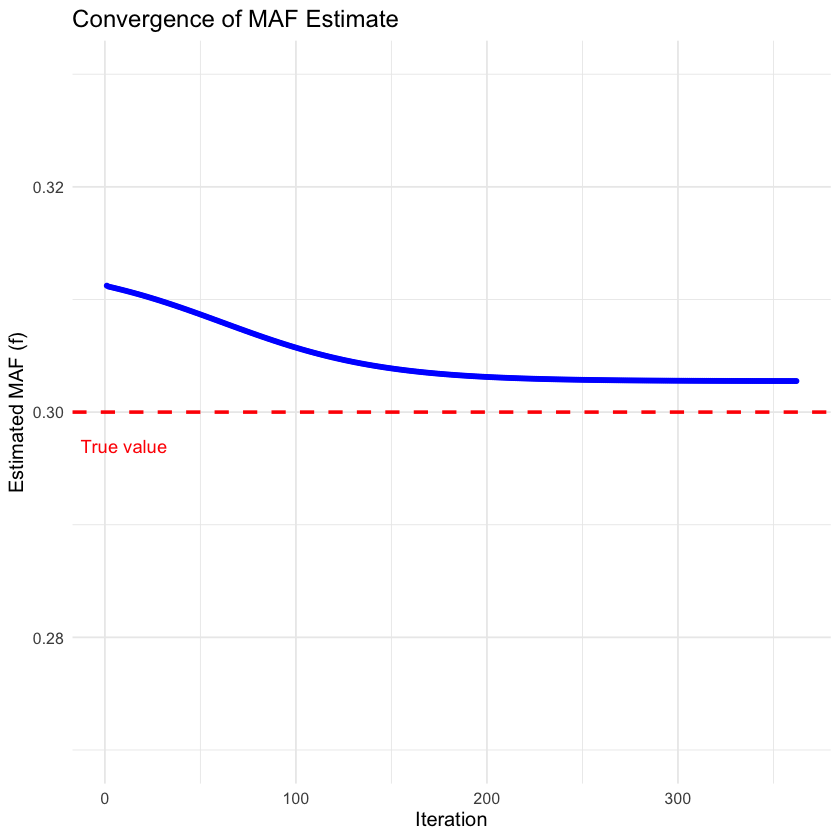

In [12]:
p1 <- ggplot(results$history[-1, ], aes(x = iteration, y = f)) +
  geom_point(color = "blue", size = 1) +
  geom_hline(yintercept = f_true, linetype = "dashed", color = "red", linewidth = 1) +
  ylim(f_true*0.9, f_true*1.1) +
  annotate("text", x = 10, y = f_true * 0.99, 
           label = "True value", color = "red") +
  labs(title = "Convergence of MAF Estimate",
       x = "Iteration",
       y = "Estimated MAF (f)") +
  theme_minimal() +
  theme(text = element_text(size = 12))
p1

In [13]:
comparison <- data.frame(
  Parameter = c("MAF (f)", "Error rate (ε)"),
  True_Value = c(f_true, epsilon_true),
  EM_Estimate = c(results$f, results$epsilon),
  Absolute_Error = c(abs(results$f - f_true), abs(results$epsilon - epsilon_true))
)
comparison

Parameter,True_Value,EM_Estimate,Absolute_Error
<chr>,<dbl>,<dbl>,<dbl>
MAF (f),0.30,0.30275828,0.002758281
Error rate (ε),0.05,0.05268373,0.002683732
